In [1]:
#              #########################################################################
#              #                           IN THE NAME OF ALLAH                        #
#              #                    CONFINED CONCRETE SECTION ANALYSIS                 #
#              #      DOF[1]: CONFINED CONCRETE SECTION AXIAL FORCE-STRAIN ANALYSIS    #
#              #      DOF[3]: CONFINED CONCRETE SECTION MOMENT-CURVATURE ANALYSIS      #
#              #-----------------------------------------------------------------------#
#              #       THIS PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)      #
#              #                   EMAIL: salar.d.ghashghaei@gmail.com                 #
#              #########################################################################

In [2]:
# pip install openseespy
# pip install --upgrade openseespy
# pip install opsvis

In [3]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import opsvis as opsv
import matplotlib.pyplot as plt

In [4]:
# Create a directory at specified path with name 'directory_path'
import os
directory_path = 'C:\\OPENSEESPY_SALAR'

# Check if the directory already exists
if not os.path.exists(directory_path):
    os.mkdir(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists. Skipping creation.")

Directory 'C:\OPENSEESPY_SALAR' already exists. Skipping creation.


In [5]:
# OUTPUT DATA ADDRESS:
FOLDER_NAME = 'CONCRETE_SECTION_ANALYSIS'
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';    

In [6]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)  

In [7]:
def CURRENT_TIME():
    import time
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(f"Current time (HH:MM:SS): {current_time}\n\n")
        
# ---------------------
"""
When OK equals -1, it generally indicates that the command or operation was not executed
because it was already in progress or had already been completed. This can happen if you
try to run a command that is already running or has been completed in a previous step.

When OK equals -2, it typically indicates that the command or operation was not executed
because it was not recognized or not implemented. This could mean that the command
is either misspelled, not available in the current version of OpenSees, or not applicable to the current context.

When OK equals -3, it typically means that the command or operation failed.
This could be due to various reasons, such as incorrect input parameters,
syntax errors, or issues with the model setup.
"""
def ANALYSIS(OK, INCREMENT, TOLERANCE, MAX_ITERAIONS):
    import openseespy.opensees as op
    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:
            if OK != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], TOLERANCE, MAX_ITERAIONS) 
                OK = op.analyze(INCREMENT)                            
                print(test[i], algorithm[j], OK)             
                if OK == 0:
                    break
            else:
                continue
     
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    
    # EI and Ductility_Rito
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    # MOMENT-CURVAVTURE ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('  Curvature    Moment')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    """
    print('+--------------------------------------------------------------------+')
    print(f' Elastic Flextural Rigidity :             {Elastic_ST:.2f}')
    print(f' Plastic Flextural Rigidity :             {Plastic_ST:.2f}')
    print(f' Tangent Flextural Rigidity :             {Tangent_ST:.2f}')
    print(f' Section Ductility Ratio :                {Ductility_Rito:.2f}')
    print(f' Section Over Strength Factor:            {Over_Strength_Factor:.2f}')
    print('+--------------------------------------------------------------------+')
    
    """
    # PUSHOVER ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, X2, Y2, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        # Plot 2 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        # Plot 3 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'g-*', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02, LEGEND03], loc='lower right')
        plt.grid(True)
        plt.show() 
# -----------------------------------------------
def Check_Number(NUM):
    import sys as ss
    if NUM == 1 or NUM == 3:
        return True
    else:
        print('\t\t ERROR: DOF MUST BE JUST 1 OR 3')
        return ss.exit()

Unconfined concrete peak stress (fc): 30.00 N/mm^2
Confined concrete peak stress (fcc): 38.73 N/mm^2
Confined concrete ultimate strain (ecuc): 0.016515
Unconfined concrete ultimate stress (fcu): 26.10 N/mm^2


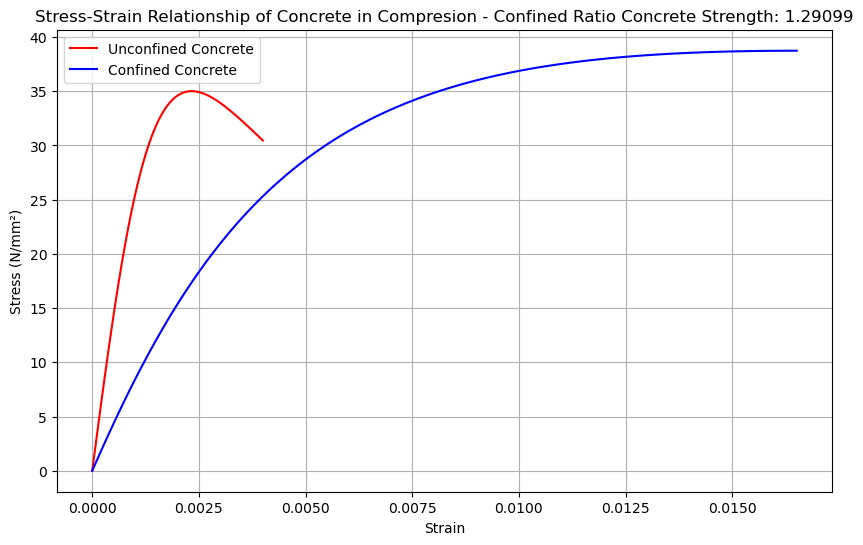

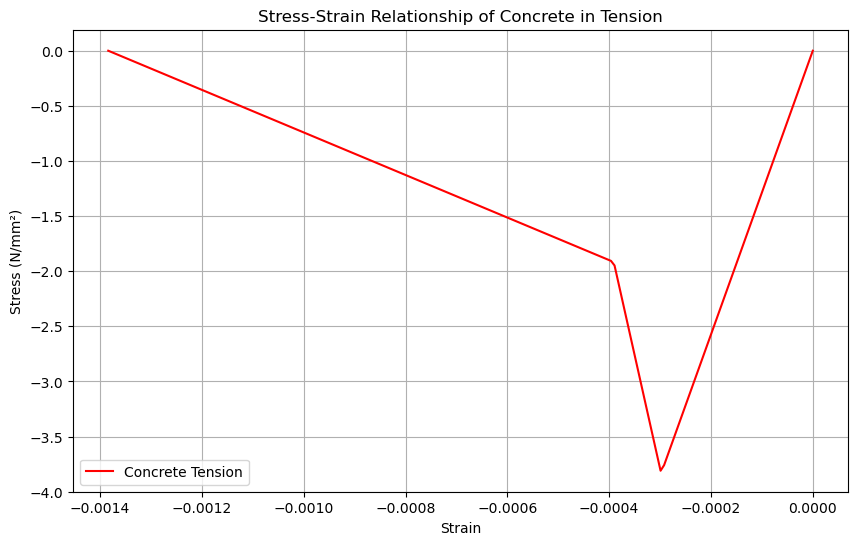

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Mander_Concrete_Properties():
    # Section Properties
    b = 600  # [mm]
    h = 600  # [mm]
    As = np.array([2454.296, 981.7184, 981.7184, 981.7184, 2454.296])  # [mm^2] NOTE: As1 & As2 = 5fi25
    cover = 50  # [mm] Concrete cover

    # Concrete Properties
    fc = 30  # [N/mm^2] Unconfined concrete strength
    ecu = 0.004  # Ultimate concrete strain
    esp = ecu + 0.002  # Spalling concrete strain
    Ec = 4700 * np.sqrt(fc)
    ec0 = (2 * fc) / Ec
    fct = -0.7 * np.sqrt(fc)  # Concrete crack stress
    ect1 = (2 * fct) / Ec
    ect2 = (2.625 * fct) / Ec
    ect3 = (9.292 * fct) / Ec

    # Reinforcing steel Properties
    fy = 400  # [N/mm^2] Yield strength of reinforcing steel
    Es = 200000  # [N/mm^2] Modulus of elasticity of steel
    fu = 1.23 * fy  # Ultimate steel stress
    ey = fy / Es  # Yield steel strain
    esh = 0.01  # Strain at steel strain-hardening
    esu = 0.09  # Ultimate steel strain
    Esh = (fu - fy) / (esu - esh)

    # Reinforcing stirrup Properties
    fyh = 300  # [N/mm^2] Transverse Reinforcing Bar Yield Stress
    Nx = 4  # Total transverse hoop legs in the X
    Ny = 4  # Total transverse hoop legs in the Y
    diastirrup = 10  # [mm] Cross-sectional hoop diameter
    wi = (b - cover) * (h - cover) # [mm^2] Total summation of confined reinforcing steel in power
    s = 100  # [mm] Tie Spacing Along Member

    Asp = np.pi * (diastirrup ** 2) / 4
    cx = h - 2 * cover - diastirrup  # Confined core dimensions in the X
    cy = b - 2 * cover - diastirrup  # Confined core dimensions in the Y
    ro_x = Nx * Asp / (s * cx)  # X transverse steel reinforcing ratio
    ro_y = Ny * Asp / (s * cy)  # Y transverse steel reinforcing ratio
    ro_s = ro_x + ro_y
    sBAR = s - diastirrup
    Wi = 1 - (wi / (6 * cx * cy))
    Ki = (1 - (sBAR / (2 * cx))) * (1 - (sBAR / (2 * cy)))
    rcc = np.sum(As) / (cx * cy)  # Ratio of the longitudinal reinforcement area to section core area
    ke = 0.75
    f_BAR_lx = ke * ro_x * fyh
    f_BAR_ly = ke * ro_y * fyh
    flx = f_BAR_lx / fc
    fly = f_BAR_ly / fc

    # Peak stress of confined concrete: Mander Solution
    A = 196.5 * fly ** 2 + 29.1 * fly - 4
    B = -69.5 * fly ** 2 + 8.9 * fly + 2.2
    C = -6.83 * fly ** 2 + 6.38 * fly + 1
    D = -1.5 * fly ** 2 - 0.55 * fly + 0.3

    if fly < flx and fly <= 0.15:
        FCC = A * flx ** 2 + B * fly + C
    elif fly < flx and fly > 0.15:
        FCC = ((flx - fly) * B / (0.3 - fly)) + C
    else:
        FCC = C

    fcc = fc * FCC
    K = fcc / fc # Confined Ratio Concrete Strength
    ecc = ec0 * (1 + 5 * (K - 1))
    Esec = fcc / ecc
    r = Ec / (Ec - Esec)
    ecuc = ecu + (1.4 * ro_s * fyh * esu) / fcc  # Ultimate confined concrete strain (Priestley)
    EsecU = fc / ec0
    R = Ec / (Ec - EsecU)
    fcu = (fc * R * (ecu / ec0)) / (R - 1 + (ecu / ec0) ** R)
    
    print(f'Unconfined concrete peak stress (fc): {fc:.2f} N/mm^2')
    print(f'Confined concrete peak stress (fcc): {fcc:.2f} N/mm^2')
    print(f'Confined concrete ultimate strain (ecuc): {ecuc:.6f}')
    print(f'Unconfined concrete ultimate stress (fcu): {fcu:.2f} N/mm^2')

    return R, r, K, Ec, ec0, ecc, fcc, ecuc, fcu, ecu, ecuc, fct, ect1, ect2, ect3 

def stress_strain_relation(fc, fcc, R, r, confined_range, unconfined_range, ecu, ecuc):
    # Calculate unconfined concrete stress-strain
    unconfined = (fc * R * (unconfined_range / ecu)) / (R - 1 + (unconfined_range / ecu) ** R)

    # Calculate confined concrete stress-strain
    confined = (fcc * r * (confined_range / ecuc)) / (r - 1 + (confined_range / ecuc) ** r)

    return unconfined, confined

# Call the functions
R, r, K, Ec, ec0, ecc, fcc, ecuc, fcu, ecu, ecuc ,fct, ect1, ect2, ect3 = Mander_Concrete_Properties()

# Define parameters
fc = 35 # [N/mm^2] Nominal concrete compressive strength 

#########################################
#### COMPRESSION STRESS-STRAIN RELATION
#########################################

confined_range = np.linspace(0, ecuc, 100)
unconfined_range = np.linspace(0, ecu, 100)


# Get stress-strain values
unconfined, confined = stress_strain_relation(fc, fcc, R, r, confined_range, unconfined_range, ec0, ecuc)

# Plotting the stress-strain relationships
plt.figure(figsize=(10, 6))
plt.plot(unconfined_range, unconfined, label='Unconfined Concrete', color='red')
plt.plot(confined_range, confined, label='Confined Concrete', color='blue')
plt.xlabel('Strain')
plt.ylabel('Stress (N/mm²)')
plt.title(f'Stress-Strain Relationship of Concrete in Compresion - Confined Ratio Concrete Strength: {K:.5f}')
plt.legend()
plt.grid(True)
plt.show()

######################################
#### TENSION STRESS-STRAIN RELATION
######################################

def concrete_tension_stress_strain(ec, Ec, fct, ect1, ect2, ect3):
    if ec <= 0 and ec >= ect1:
        f = 0.5 * Ec * ec
    elif ec < ect1 and ec >= ect2:
        f = fct - (0.5 * fct / (ect2 - ect1)) * (ec - ect1)
    elif ec < ect2 and ec >= ect3:
        f = 0.5 * fct - (0.5 * fct / (ect3 - ect2)) * (ec - ect2)
    elif ec < ect3:
        f = 0
    else:
        f = 0  # Ensure f is defined if none of the conditions are met
    return f

# Strain range for plotting
strain_range = np.linspace(0, ect3, 200)
stress_strain = np.array([concrete_tension_stress_strain(x, Ec, fct, ect1, ect2, ect3) for x in strain_range])

# Plotting the stress-strain curve
plt.figure(figsize=(10, 6))
plt.plot(strain_range, stress_strain, label='Concrete Tension', color='red')
plt.xlabel('Strain')
plt.ylabel('Stress (N/mm²)')
plt.title('Stress-Strain Relationship of Concrete in Tension')
plt.legend()
plt.grid(True)
plt.show()



In [9]:
def CONCRETE_SECTION_PLOT(Bcol, Hcol, Bbeam, Hbeam, cover, Rebar_D, nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT):
    import matplotlib.pyplot as plt
    import numpy as np
    import openseespy.opensees as ops
    import opsvis as opsv
    Mat_Tag01 = 1 # Confined Concrete Section Tag
    Mat_Tag02 = 2 # Unconfined Concrete Section Tag
    Mat_Tag03 = 3 # Steel Rebar Section Tag
    SECTION_TAG_01 = 1 # Concrete Column Section Tag
    SECTION_TAG_02 = 2 # Concrete Beam Section Tag
    
    fc = -35 # [N/mm^2] Nominal concrete compressive strength
    Ec = 4700 * np.sqrt(-fc) # [N/mm^2] Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.29;			# ratio of confined to unconfined concrete strength - COLUMN
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress - COLUMN
    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = 5*eps1U;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    print('Confined Concrete: ', fc1C, eps1C, fc2C, eps2C, ftC, Ets)
    print('Unconfined Concrete: ', fc1U, eps1U, fc2U, eps2U, ftU, Ets)
    ops.uniaxialMaterial('Concrete02', Mat_Tag01, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build core concrete (confined)
    ops.uniaxialMaterial('Concrete02', Mat_Tag02, fc1U, eps1U, fc2U, eps2U, Lambda, ftU, Ets) # build cover concrete (unconfined)
    # REBAR MATERIAL PROPERTIES:
    """
    Fy = 4000			# Steel rebar yield stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    ops.uniaxialMaterial('Steel02', Mat_Tag03, Fy, Es, Bs, R0, cR1, cR2) # build reinforcement material  
    """
    
    E_steel = 210e3               # [N/mm²] Steel Rebar Young's modulus
    fy_steel = 4000               # [N/mm²] Steel Rebar Yield strength
    fu_steel = 1.23 * fy_steel    # [N/mm²] Steel Rebar Ultimate strength
    esh = 0.01                    # Strain corresponding to initial strain hardening
    eult = 0.09                   # Strain at peak stress
    Esh = (fu_steel - fy_steel)/(eult - esh)
    """
    ops.uniaxialMaterial('ReinforcingSteel', Mat_Tag03, fy_steel, fu_steel, E_steel, Esh, esh, eult)
    """
    """
    Fy = 4000			# Steel rebar yield tension stress
    FyC = 2500			# Steel rebar yield compression stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    #                                      $matTag $Fy $FyC $E $b $R0 $cR1 $cR2 $a1 $a2 $a3 $a4 $sigcr $beta $sigmin $FI_lim
    ops.uniaxialMaterial('SteelFractureDI', Mat_Tag03, Fy, FyC, Es, Bs, R0, cR1, cR2, 0.08, 1.00, 0.08, 1.00, 120, 0.8, 20, 1.0)
    """
    pinchX = 0.8           # Pinching factor in X direction
    pinchY = 0.5           # Pinching factor in Y direction
    damage1 = 0.0          # Damage due to ductility
    damage2 = 0.0          # Damage due to energy
    beta = 0.1             # Stiffness degradation parameter
    ey = fy_steel / E_steel
    ops.uniaxialMaterial('Hysteretic', Mat_Tag03, fy_steel, ey, fu_steel, eult, 0.2*fu_steel, 1.1*eult,
                         -fy_steel, -ey, -fu_steel, -eult, -0.2*fu_steel, -1.1*eult,
                         pinchX, pinchY, damage1, damage2, beta)
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #             ---------------------     --   --
    #             |   o  o   o    o   |     |    -- cover
    #             |                   |     |
    #             |   o           o   |     |
    #    z <---   |          +        |     H
    #             |   o           o   |     |
    #             |                   |     |
    #             |   o  o    o   o   |     |    -- cover
    #             ---------------------     --   --
    #             |-------- B --------|
    #
    # RC section: 
    
    y1col = Hcol/2.0
    z1col = Bcol/2.0

    y2col = 0.5 * (Hcol - 2 * cover) / 2;

    #nFibCoverZ, nFibCoverY = 1 , 20
    #nFibCoreZ, nFibCoreY = 2, 16
    As = (np.pi * Rebar_D ** 2) / 4; # [mm^2] Rebar Area

    FIBER_SEC_01 = [['section', 'Fiber', SECTION_TAG_01, '-GJ', 1.0e6],
                 ['patch', 'rect', Mat_Tag01, nFibCoreY, nFibCoverZ, cover-y1col, cover-z1col, y1col-cover, z1col-cover], # CORE
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, -z1col, y1col, cover-z1col],                # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, z1col-cover, y1col, z1col],                 # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, cover-z1col, cover-y1col, z1col-cover],     # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, y1col-cover, cover-z1col, y1col, z1col-cover],      # COVER
                 ['layer', 'straight', Mat_Tag03, 5, As, y1col-cover, z1col-cover, y1col-cover, cover-z1col],             # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, y2col, z1col-cover, y2col, cover-z1col],                         # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, 0, z1col-cover, 0, cover-z1col],                                 # REBAR
                 ['layer', 'straight', Mat_Tag03, 2, As, -y2col, z1col-cover, -y2col, cover-z1col],                       # REBAR
                 ['layer', 'straight', Mat_Tag03, 5, As, cover-y1col, z1col-cover, cover-y1col, cover-z1col]              # REBAR
                ]
    
    if PLOT == 'True':
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC_01, matcolor=matcolor)
        # Set the x and y limits
        LIMIT_Y = 0.5*Hcol + 10
        LIMIT_X = 0.5*Bcol + 10
        plt.ylim(-LIMIT_Y, LIMIT_Y)
        plt.xlim(-LIMIT_X, LIMIT_X)
        plt.title('COLUMN SECTION')
        plt.show()

    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #             ---------------------     --   --
    #             |   o  o   o    o   |     |    -- cover
    #             |                   |     |
    #             |                   |     |
    #    z <---   |          +        |     H
    #             |                   |     |
    #             |                   |     |
    #             |   o  o    o   o   |     |    -- cover
    #             ---------------------     --   --
    #             |-------- B --------|
    #
    # RC section: 
    
    y1col = Hbeam/2.0
    z1col = Bbeam/2.0

    y2col = 0.5*(Hbeam-2*cover)/3.0

    #nFibCoverZ, nFibCoverY = 1 , 20
    #nFibCoreZ, nFibCoreY = 2, 16
    As = (np.pi * Rebar_D ** 2) / 4; # [mm^2] Rebar Area

    FIBER_SEC_02 = [['section', 'Fiber', SECTION_TAG_02, '-GJ', 1.0e6],
                 ['patch', 'rect', Mat_Tag01, nFibCoreY, nFibCoreZ, cover-y1col, cover-z1col, y1col-cover, z1col-cover], # CORE
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, -z1col, y1col, cover-z1col],               # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, z1col-cover, y1col, z1col],                # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, -y1col, cover-z1col, cover-y1col, z1col-cover],    # COVER
                 ['patch', 'rect', Mat_Tag02, nFibCoverY, nFibCoverZ, y1col-cover, cover-z1col, y1col, z1col-cover],     # COVER
                 ['layer', 'straight', Mat_Tag03, 6, As, y1col-cover, z1col-cover, y1col-cover, cover-z1col],            # REBAR
                 #['layer', 'straight', Mat_Tag03, 2, As, y2col, z1col-cover, y2col, cover-z1col],                       # REBAR
                 #['layer', 'straight', Mat_Tag03, 2, As, -y2col, z1col-cover, -y2col, cover-z1col],                     # REBAR
                 ['layer', 'straight', Mat_Tag03, 6, As, cover-y1col, z1col-cover, cover-y1col, cover-z1col]             # REBAR
                ]
    
    if PLOT == 'True':
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC_02, matcolor=matcolor)
        # Set the x and y limits
        LIMIT_Y = 0.5*Hbeam + 10
        LIMIT_X = 0.5*Bbeam + 10
        plt.ylim(-LIMIT_Y, LIMIT_Y)
        plt.xlim(-LIMIT_X, LIMIT_X)
        plt.title('BEAM SECTION')
        plt.show()    
    return FIBER_SEC_01, FIBER_SEC_02    

Confined Concrete:  -45.15 -0.0032475501788078744 -9.03 -0.016237750894039372 24.8325 9625.0
Unconfined Concrete:  -35 -0.0025 -7.0 -0.0125 19.25 9625.0


<Figure size 640x480 with 0 Axes>

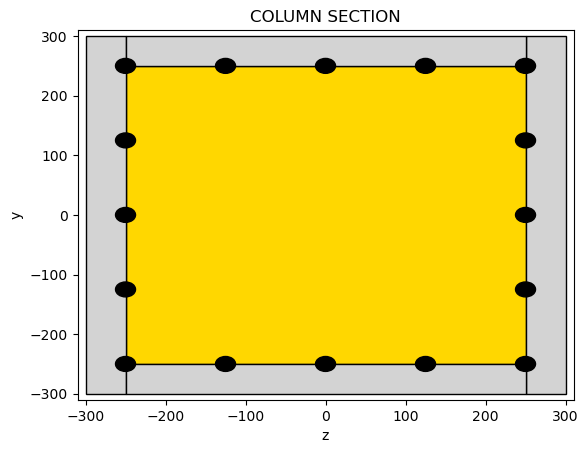

<Figure size 640x480 with 0 Axes>

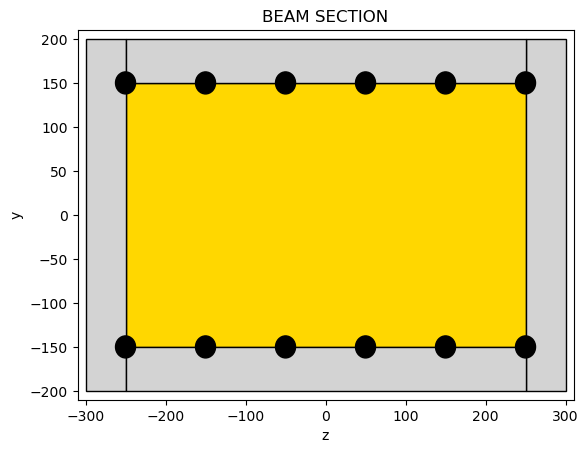

In [10]:
nFibCoverZ, nFibCoverY = 1 , 1
nFibCoreZ, nFibCoreY = 1, 1
FS01, FS02 = CONCRETE_SECTION_PLOT(600, 600, 600, 400, 50, 25,nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT='True')

In [11]:
### -------------------------------
###    SECTION ANALYSIS FUNCTION
### -------------------------------
def SECTION_ANALYSIS(axial, shear, moment, DR, STRAIN_ULT, DOF):
    Check_Number(DOF)
    op.wipe()
    op.model('basic','-ndm',2,'-ndf',3)
    
    # Define fiber section for I-section
    Bcol, Hcol, Bbeam, Hbeam = 600, 600, 600, 400; # [mm] Column & Beam Section Diamenstion Properties
    COVER = 50        # [mm] Concrete Cover
    REBAR_DIA = 25    # [mm] Steel Rebar Diameter
    
    NUM_INCR = 4000 # Number of analysis increments
    Yield_Strain = 0.002 # Yield Concrete Strain
    MAX_ITERATIONS = 5000# Maximum number of iterations
    TOLERANCE = 1.0e-12# Specified tolerance for convergence
    nFibCoverZ, nFibCoverY = 3, 120
    nFibCoreZ, nFibCoreY = 3, 120
    SECTION_01, SECTION_02 = CONCRETE_SECTION_PLOT(Hcol, Bcol, Hbeam, Bbeam, COVER, REBAR_DIA, 
                                                   nFibCoverZ, nFibCoverY, nFibCoreZ, nFibCoreY, PLOT=0)
    
    # ----------------
    opsv.fib_sec_list_to_cmds(SECTION_02) # SECTION 02
    SecTag = 2 # SECTION 1 SELECTED FOR ANALYSIS
    # ----------------
    
    # Yield Curvature
    if DOF == 1:
        Ky = Yield_Strain
    if DOF == 3:
        Ky = Yield_Strain / (0.5 * Hcol)    
    #print('Ky', Ky)
    
    # Ultimate Curvature
    Ku = Ky * DR
    #print('Ku', Ku)
    # Define two nodes at (0,0)
    op.node(1, 0.0, 0.0)
    op.node(2, 0.0, 0.0)

    # Fix all degrees of freedom except axial and bending
    op.fix(1, 1, 1, 1)
    op.fix(2, 0, 1, 0)  
    # Define element
    #                             tag ndI ndJ  secTag
    op.element('zeroLengthSection',  1, 1, 2, SecTag)
    # Create recorder
    op.recorder('Node', '-file', f"{SALAR_DIR}CUR.txt",'-time', '-node', 2, '-dof', DOF, 'disp')# Curvature Time History nodes 2
    op.recorder('Node', '-file', f"{SALAR_DIR}MOM.txt",'-time', '-node', 1, '-dof', DOF, 'reaction')# Base Shear Time History nodes 1

    # Define constant axial load
    op.timeSeries('Constant', 1)
    op.pattern('Plain', 1, 1)
    op.load(2, axial, shear, moment)
    
    # Define gravity analysis parameters
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('ModifiedNewton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    OK = op.analyze(NstepGravity) # apply gravity
    ANALYSIS(OK, NstepGravity, TOLERANCE, MAX_ITERATIONS)
    print('Load Done.')

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    
    # Define incremental displacement analysis parameters
    op.integrator('LoadControl', 0.01)
    op.system('SparseGeneral', '-piv')
    op.test('EnergyIncr', TOLERANCE, MAX_ITERATIONS)
    op.numberer('Plain')
    op.constraints('Plain')
    op.algorithm('ModifiedNewton')
    op.analysis('Static')

    # Do one analysis for constant axial load
    OK = op.analyze(1)
    ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)

    # Define reference moment
    op.timeSeries('Linear', 2)
    op.pattern('Plain',2, 2)
    # Compute curvature increment
    dK = Ku / NUM_INCR
    if DOF == 1:# AXIAL FORCE - AXIAL STRAIN ANALYSIS
        op.load(2, 1.0, 0.0, 0.0)
        # Use displacement control at node 2 for section analysis
        op.integrator('DisplacementControl', 2, 1, dK, 1, dK, dK)
    if DOF == 3:# MOMENT-CURVATURE ANALYSIS
        op.load(2, 0.0, 0.0, 1.0)
        # Use displacement control at node 2 for section analysis
        op.integrator('DisplacementControl', 2, 3, dK, 1, dK, dK)

    Depth = Hcol
    # Do the section analysis
    strain = 0.0
    it = 0
    while strain > STRAIN_ULT:
        #OK = op.analyze(NUM_INCR)
        #ANALYSIS(OK, NUM_INCR, TOLERANCE, MAX_ITERATIONS)
        if DOF == 1:
            OK = op.analyze(1)
            ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
            strain = -op.nodeDisp(2,1)
            #print(f'ITERTION {it+1} STRAIN {strain} DONE')
        if DOF == 3:
            OK = op.analyze(1)
            ANALYSIS(OK, 1, TOLERANCE, MAX_ITERATIONS)
            strain = op.nodeDisp(2,1) - Depth/2 * op.nodeDisp(2,3)
            #print(f'ITERTION {it+1} STRAIN {strain} DONE')
        it += 1 # update iterations           
    print(f'SECTION ANALYSIS DONE.')
    op.wipe()

In [12]:
# ------------------------------------
# Axial Force-Strain Section Analysis
# ------------------------------------

# Call the section analysis procedure:
axial = -50.0        # [N] PY - VERTICAL FORCE - DOF[11]
shear =  0.0         # [N] PX - HORIZENTAL FORCE - DOF[10]
moment = 0.0         # [N.mm] MZ - MOMENT FORCE - DOF[12]
DR = 4.5             # [mm/mm] set ductility ratio for axial force-strain
STRAIN_ULT = -0.004  # [mm/mm] ULTIMATE STRAIN (IN HERE NEGATIVE VALUE IS COMPRESSION)
DOF = 1              # AXIAL FORCE - AXIAL STRAIN ANALYSIS
SECTION_ANALYSIS(axial, shear, moment, DR, STRAIN_ULT, DOF)

Confined Concrete:  -45.15 -0.0032475501788078744 -9.03 -0.016237750894039372 24.8325 9625.0
Unconfined Concrete:  -35 -0.0025 -7.0 -0.0125 19.25 9625.0
Load Done.


WARNING can't set handler after analysis is created


SECTION ANALYSIS DONE.


+--------------------------------------------------------------------+
 Elastic Flextural Rigidity :             7927825080.47
 Plastic Flextural Rigidity :             1237003467.08
 Tangent Flextural Rigidity :             -78395304.91
 Section Ductility Ratio :                6.09
 Section Over Strength Factor:            0.95
+--------------------------------------------------------------------+


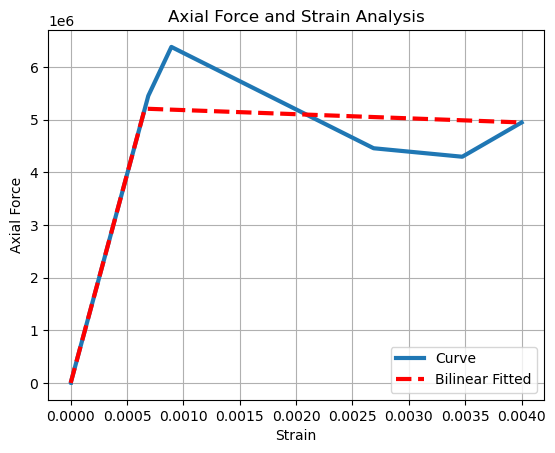

		 Ductility Ratio: 0.9497


In [13]:
# ------------------------------------------
#  Plot Axial Force-Strain Section Analysis
# ------------------------------------------
STR = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'CUR', 1, 0, 1)
FORCE = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'MOM', 1, 0, 1)
xxc, yyc, _, _, _, _, _ = BILNEAR_CURVE(STR, -FORCE, 10)
xxc = np.abs(xxc); yyc = np.abs(yyc); # ABSOLUTE VALUE
XLABEL = 'Strain'
YLABEL = 'Axial Force'
LEGEND01 = 'Curve'
LEGEND02 = 'Bilinear Fitted'
TITLE = 'Axial Force and Strain Analysis'
COLOR = 'black'
PLOT_2D(STR, -FORCE, xxc, yyc, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, _, COLOR='black', Z=2) 
print(f'\t\t Ductility Ratio: {yyc[2]/yyc[1]:.4f}')

In [14]:
# ------------------------------------
#   Moment-Curvature Section Analysis
# ------------------------------------
# Call the section analysis procedure:
axial = -50.0           # [N] PY - VERTICAL FORCE - DOF[11]
shear =  0.0            # [N] PX - HORIZENTAL FORCE - DOF[10]
moment = 0.0            # [N.mm] MZ - MOMENT FORCE - DOF[12]
DR = 35.5               # [mm/mm] set ductility ratio for moment curvature
STRAIN_ULT = -0.071     # [mm/mm] ULTIMATE STRAIN
DOF = 3                 # AXIAL FORCE - AXIAL STRAIN ANALYSIS
SECTION_ANALYSIS(axial, shear, moment, DR, STRAIN_ULT, DOF)

Confined Concrete:  -45.15 -0.0032475501788078744 -9.03 -0.016237750894039372 24.8325 9625.0
Unconfined Concrete:  -35 -0.0025 -7.0 -0.0125 19.25 9625.0
Load Done.


WARNING can't set handler after analysis is created


SECTION ANALYSIS DONE.


+--------------------------------------------------------------------+
 Elastic Flextural Rigidity :             346065452508728.69
 Plastic Flextural Rigidity :             24555769404473.22
 Tangent Flextural Rigidity :             8686243617769.50
 Section Ductility Ratio :                21.26
 Section Over Strength Factor:            1.51
+--------------------------------------------------------------------+


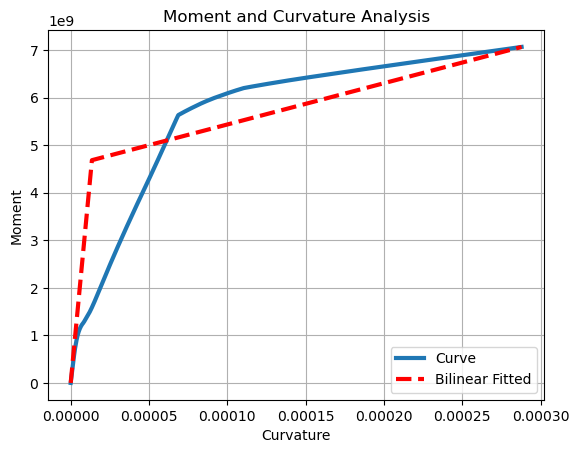

		 Ductility Ratio: 1.5085


In [15]:
# -----------------------------------------
#   Plot Moment-Curvature Section Analysis
# -----------------------------------------
CUR = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'CUR', 1, 0, 1)
MOM = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'MOM', 1, 0, 1)
xxc, yyc, _, _, _, _, _ = BILNEAR_CURVE(CUR, -MOM, 0)
xxc = np.abs(xxc); yyc = np.abs(yyc); # ABSOLUTE VALUE
XLABEL = 'Curvature'
YLABEL = 'Moment'
LEGEND01 = 'Curve'
LEGEND02 = 'Bilinear Fitted'
TITLE = 'Moment and Curvature Analysis'
COLOR = 'black'
PLOT_2D(CUR, -MOM, xxc, yyc, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, _, COLOR='black', Z=2) 
print(f'\t\t Ductility Ratio: {yyc[2]/yyc[1]:.4f}')